In [1]:
import rasterio
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
import utilidades

#directivas de matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.titlesize'] = 20

In [2]:
os.chdir('/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/')

In [3]:
density = "train/3/mapa_densidad.txt"
imagen = "PROYECTOS/CONTEO_SATELITE/imagenes/corte_pequeño.tif"
salida = "density_map.tif"

In [4]:
raster = rasterio.open(imagen)

In [5]:
mapa_densidad=np.load("train/3/mapa_densidad.npy")
mapa_densidad[mapa_densidad >0 ] =1

(7560, 13238)


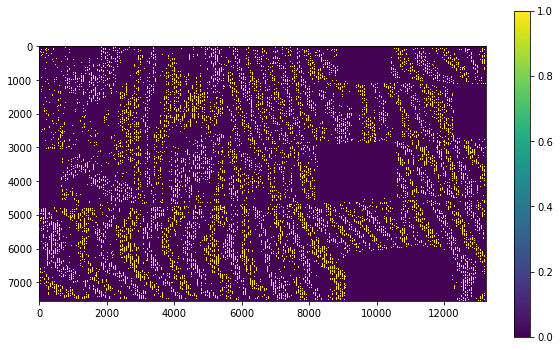

In [6]:
plt.figure(figsize=(10,6))
print(mapa_densidad.shape)
plt.imshow(mapa_densidad)
plt.colorbar()
plt.show()

## Array To Tiff

In [8]:
output_file = 'density_map_final_final.tif'
utilidades.array_to_tiff(mapa_densidad,raster,output_file)

## Array to Shapefile

In [9]:
output_file = 'density_map_final_final.shp'
utilidades.array_to_shp(mapa_densidad,raster,output_file)

## Mapa densidad

In [ ]:
url_imagen = "/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/PROYECTOS/CONTEO_SATELITE/imagenes/corte_pequeño.tif"
rotados = "/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/PROYECTOS/CONTEO_SATELITE/puntos_cortados.shp"
url_salida ="/media/daniel/Respaldo/Memoria/Codigo/AraucoNursery/"

In [ ]:
puntos = gpd.read_file(rotados)
raster = rasterio.open(url_imagen)

In [ ]:
coordenadas,csv = utilidades.get_coordenadas(raster,puntos,url_salida,"pixeles")

In [ ]:
mapa_densidad = utilidades.get_density_map_gaussian(coordenadas,raster.height,raster.width,sigma = 3)

In [ ]:
plt.figure(figsize=(10,6))
print(mapa_densidad.shape)
plt.imshow(mapa_densidad)
plt.colorbar()
plt.show()